## **Project Name: Iris Flower Classification**



### **Problem Statement**

The Iris flower, scientifically classified under the genus *Iris*, comprises three key species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*. These species display distinguishable variations in their physical traits, primarily measured in terms of sepal length, sepal width, petal length, and petal width.

### **Objective:**

The goal of this project is to design a machine learning model that can effectively classify Iris flowers into their respective species based on their morphological measurements. By leveraging the distinct physical characteristics of each species, the model aims to automate the classification process.

### **Project Overview:**

- **Iris Species**: The dataset includes samples from three Iris species: *Setosa*, *Versicolor*, and *Virginica*.
- **Key Features**: The classification relies on four critical attributes: sepal length, sepal width, petal length, and petal width.
- **Machine Learning Approach**: The project focuses on developing and training a machine learning algorithm to accurately predict the species of an Iris flower based on its measurements.



### *1. Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB

### *2. Data Loading and Analysing*

In [2]:
# Loading the dataset
df = pd.read_csv("Iris.csv")

# View top 5 rows of the dataset
print(df.head())


   Id  SepalLengthCm  SEPALWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SEPALWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Missing Values/Null Values Count
df.isnull().sum()

Id               0
SepalLengthCm    0
SEPALWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]
     

# New updated dataset
data.head()

,SepalLengthCm,SEPALWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### *3. Data Vizualization and realationship between variables*

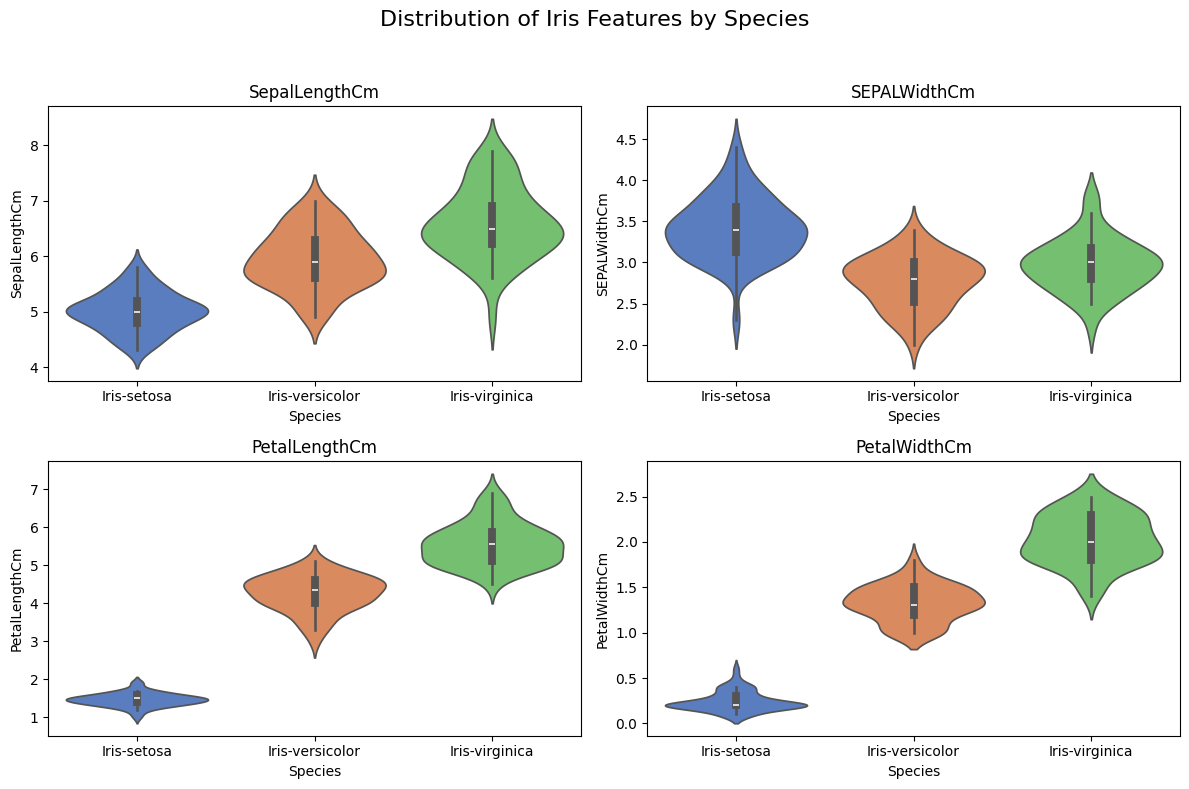

In [6]:
### distribution of numerical values

features = ['SepalLengthCm', 'SEPALWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows x 2 cols
fig.suptitle('Distribution of Iris Features by Species', fontsize=16)

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.violinplot(data=df, x='Species', y=feature, hue='Species', palette='muted', legend=False, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust space for suptitle
plt.show()

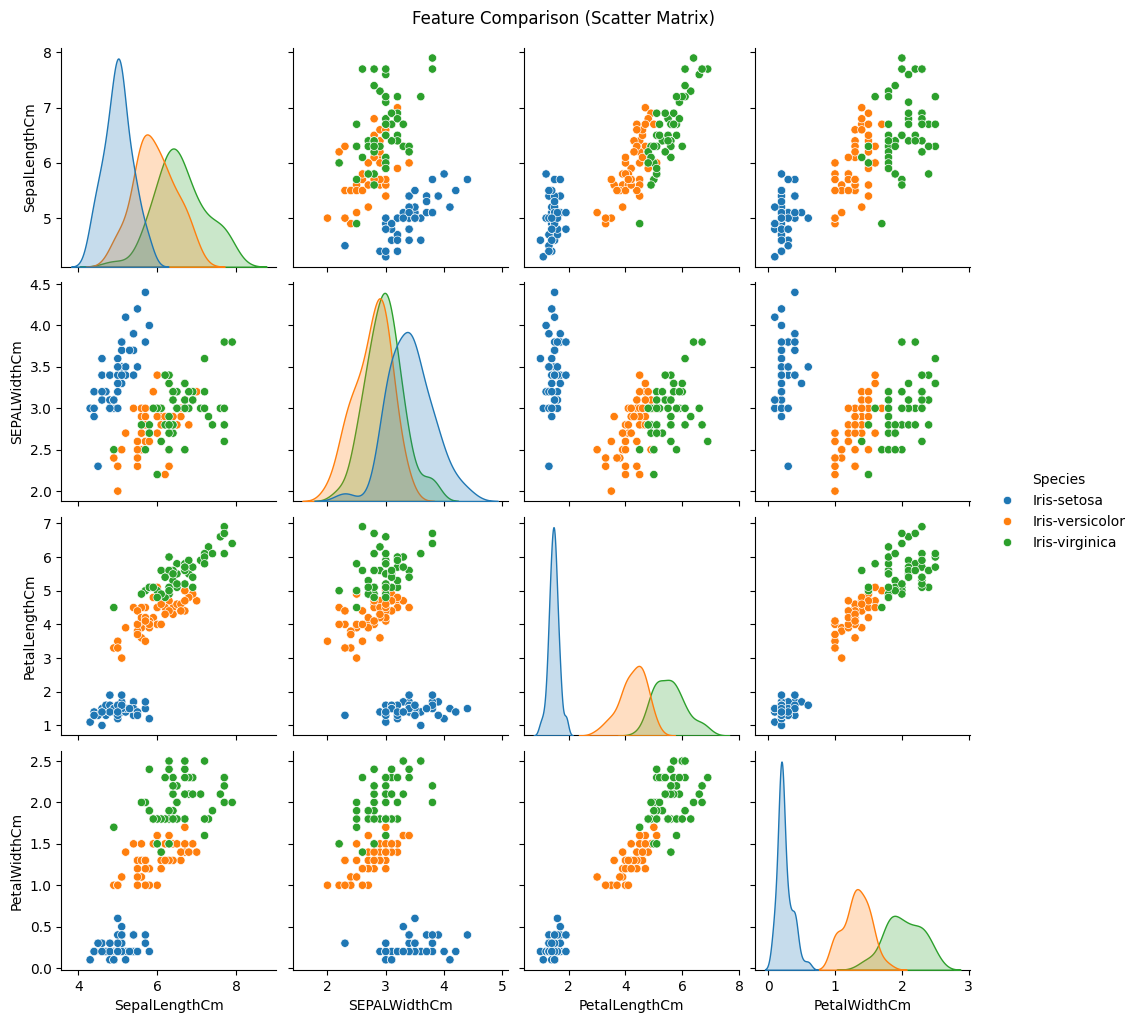

In [7]:
##comparision of the variables using scatterplot in off diagonals and KDE (Kernel Density Estimation) plots along the diagonal.

sns.pairplot(data, hue='Species')
plt.suptitle('Feature Comparison (Scatter Matrix)',y=1.02 )
plt.show()

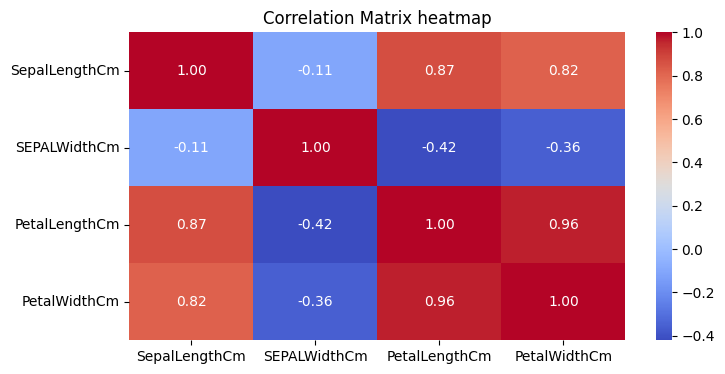

In [8]:
### Compute the correlation matrix


# Correlation Heatmap Visualization Code
corr_matrix = data.corr(numeric_only=True)

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()


### *4. Data Preprocessing*

In [9]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'Species' column
data['Species'] = le.fit_transform(data['Species'])

# Display unique encoded values
print("Encoded Species Values:", data['Species'].unique())

Encoded Species Values: [0 1 2]


 #### *Data scaling and splitting*

In [10]:
# Assuming 'data' is your DataFrame and 'Species' is the target column

# Define X (features): All columns except 'Species'
x = data.drop(columns=['Species'])

# Define y (target): Only the 'Species' column
y = data['Species']


# Splitting the data to train and test 
x_train,x_test,y_train,y_test=train_test_split( x,y, test_size=0.2 )
     

# Checking the train distribution of dependent variable
y_train.value_counts()

Species
1    40
2    40
0    40
Name: count, dtype: int64

### *5. Model Implementations*

#### *a) Logistic Regression*

In [11]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



* *Cross Validation*

In [12]:
lr = LogisticRegression(max_iter=200)
lr_scores = cross_val_score(lr, x, y, cv=5)
print("Logistic Regression Accuracy: %.2f ± %.2f" % (lr_scores.mean(), lr_scores.std()))

Logistic Regression Accuracy: 0.96 ± 0.02


#### *b) Decision Tree*

In [13]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

print(" Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

 Decision Tree
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



* *Cross Validation*

In [14]:
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, x, y, cv=5)
print("Decision Tree Accuracy: %.2f ± %.2f" % (dt_scores.mean(), dt_scores.std()))

Decision Tree Accuracy: 0.96 ± 0.03


#### *c) Support Vector Machine (SVM)*

In [15]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

print(" Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

 Support Vector Machine
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



* *Cross validation*

In [16]:
svm = SVC()
svm_scores = cross_val_score(svm, x, y, cv=5)
print("SVM Accuracy: %.2f ± %.2f" % (svm_scores.mean(), svm_scores.std()))

SVM Accuracy: 0.97 ± 0.02


#### *d) Random Forest Classifier*

In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



* *Cross Validation*

In [18]:
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, x, y, cv=5)
print("Random Forest Accuracy: %.2f ± %.2f" % (rf_scores.mean(), rf_scores.std()))

Random Forest Accuracy: 0.96 ± 0.03


#### *e) Naive Bayes*

In [19]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



* *Cross Validation*

In [20]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, x, y, cv=5)
print("Naive Bayes Accuracy: %.2f ± %.2f" % (nb_scores.mean(), nb_scores.std()))

Naive Bayes Accuracy: 0.95 ± 0.03


### *8. Choosing the best Model*

In [21]:
#the SVM model is choosed as the final model
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

* *High and stable cross validated accuracy: The SVM achieved a cross-validated accuracy of 97% (± 2%), outperforming or matching other models in terms of mean accuracy.*

* *Strong generalization capacity*

* *Suitability for small, clean datasets*

* *And mathematical robustness of SVM*